In [7]:
import pandas as pd

# Step 1: Load the dataset
dataset = pd.read_csv('telematics_syn.csv')

# Display the first few rows of the dataset to understand its structure
print(dataset.head())

# Step 2: Analyze `NB_Claim` and `AMT_Claim`
nb_claim_summary = dataset['NB_Claim'].describe()
amt_claim_summary = dataset['AMT_Claim'].describe()

print("NB_Claim Summary:")
print(nb_claim_summary)

print("\nAMT_Claim Summary:")
print(amt_claim_summary)


   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   

   Left.turn.intensity11  Left.turn.intensity12  Right.t

count    100000.00000
mean          0.04494
std           0.21813
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           3.00000
Name: NB_Claim, dtype: float64


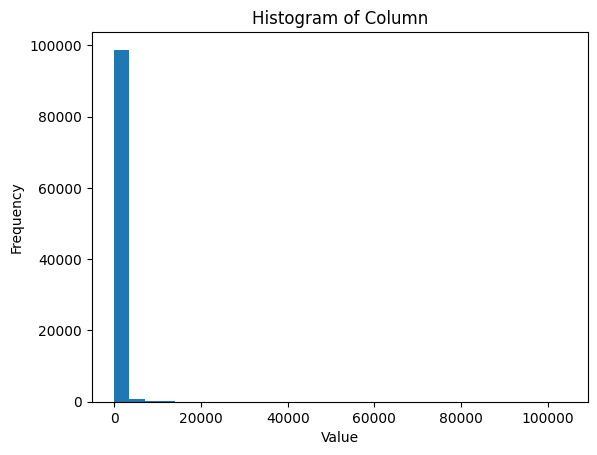

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('telematics_syn.csv')

# Creating the 'ClaimYN' column
df['ClaimYN'] = np.where((df['NB_Claim'] > 1) & (df['AMT_Claim'] > 1000), 1, 0)

# Identify categorical columns
categorical_cols = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Perform one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Dropping 'NB_Claim' and 'AMT_Claim' from features
X = df.drop(columns=['NB_Claim', 'AMT_Claim', 'ClaimYN'])
y = df['ClaimYN']

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_val_cnn, y_val), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9945 - loss: 0.0308 - val_accuracy: 0.9984 - val_loss: 0.0120
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9981 - loss: 0.0125 - val_accuracy: 0.9984 - val_loss: 0.0096
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0103 - val_accuracy: 0.9984 - val_loss: 0.0142
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9983 - loss: 0.0104 - val_accuracy: 0.9984 - val_loss: 0.0104
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9984 - loss: 0.0093 - val_accuracy: 0.9984 - val_loss: 0.0105
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0086 - val_accuracy: 0.9984 - val_loss: 0.0089
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0076 - val_accuracy: 0.9984 - val_loss: 0.0083
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9985 - loss: 0.0072 -

In [ ]:
# Reshape data for RNN
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_rnn = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(100, input_shape=(1, X_train.shape[1])))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training RNN model
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=20, validation_data=(X_val_rnn, y_val), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9621 - loss: 0.1788 - val_accuracy: 0.9984 - val_loss: 0.0108
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9985 - loss: 0.0099 - val_accuracy: 0.9984 - val_loss: 0.0089
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9985 - loss: 0.0086 - val_accuracy: 0.9984 - val_loss: 0.0086
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9986 - loss: 0.0079 - val_accuracy: 0.9983 - val_loss: 0.0083
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9985 - loss: 0.0081 - val_accuracy: 0.9983 - val_loss: 0.0079
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9985 - val_loss: 0.0075
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9984 - val_loss: 0.0075
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9985 - loss: 0.0072 

In [ ]:
# Evaluate CNN
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_predictions = (cnn_predictions > 0.5).astype(int)

# Evaluate RNN
rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_predictions = (rnn_predictions > 0.5).astype(int)

# Performance metrics
def evaluate_model(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    return f1, recall, precision, auc, mcc

cnn_f1, cnn_recall, cnn_precision, cnn_auc, cnn_mcc = evaluate_model(y_test, cnn_predictions)
rnn_f1, rnn_recall, rnn_precision, rnn_auc, rnn_mcc = evaluate_model(y_test, rnn_predictions)

print("CNN Performance")
print(f"F1 Score: {cnn_f1}, Recall: {cnn_recall}, Precision: {cnn_precision}, AUC: {cnn_auc}, MCC: {cnn_mcc}")

print("\nRNN Performance")
print(f"F1 Score: {rnn_f1}, Recall: {rnn_recall}, Precision: {rnn_precision}, AUC: {rnn_auc}, MCC: {rnn_mcc}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
CNN Performance
F1 Score: 0.34285714285714286, Recall: 0.21428571428571427, Precision: 0.8571428571428571, AUC: 0.6071094614709361, MCC: 0.428137694230965

RNN Performance
F1 Score: 0.6190476190476191, Recall: 0.4642857142857143, Precision: 0.9285714285714286, AUC: 0.7321094614709364, MCC: 0.6561979700115841


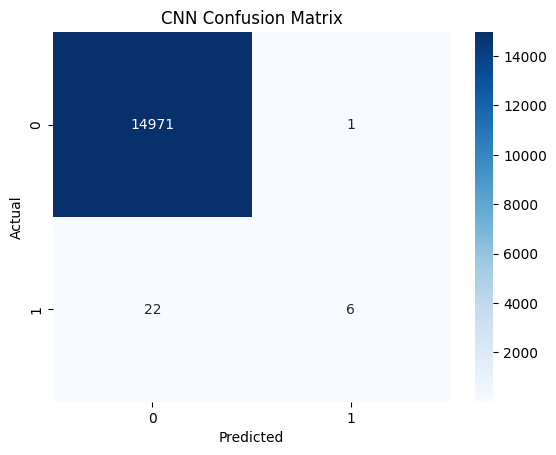

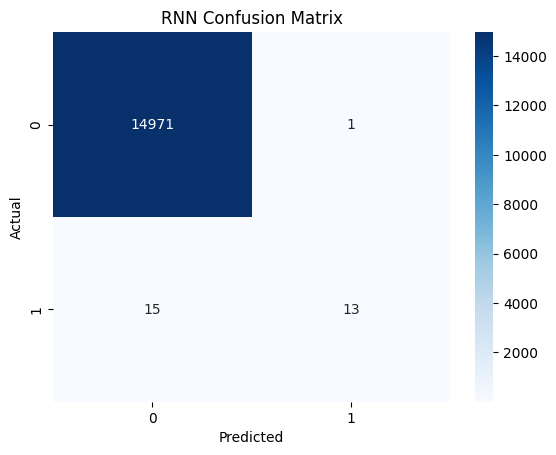

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, cnn_predictions, 'CNN Confusion Matrix')
plot_confusion_matrix(y_test, rnn_predictions, 'RNN Confusion Matrix')


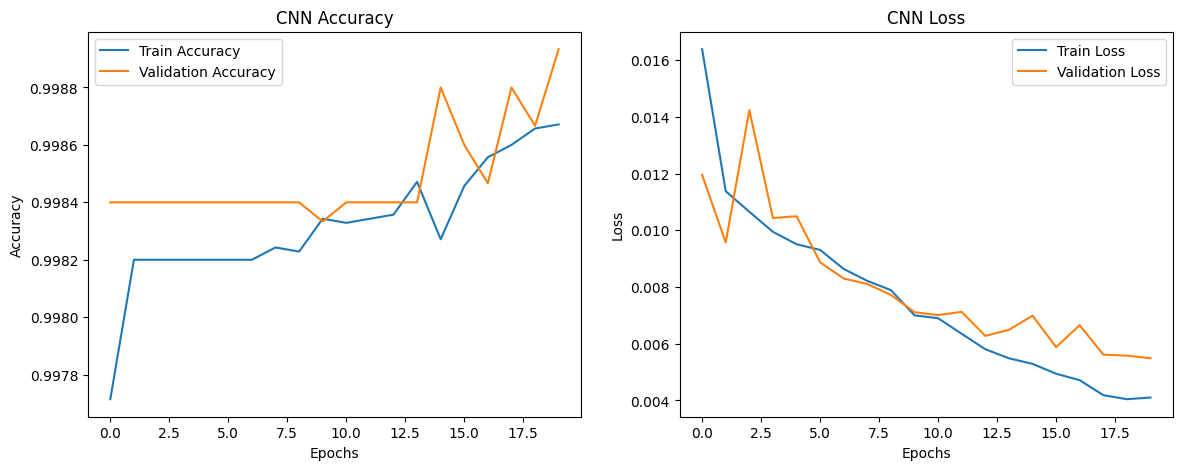

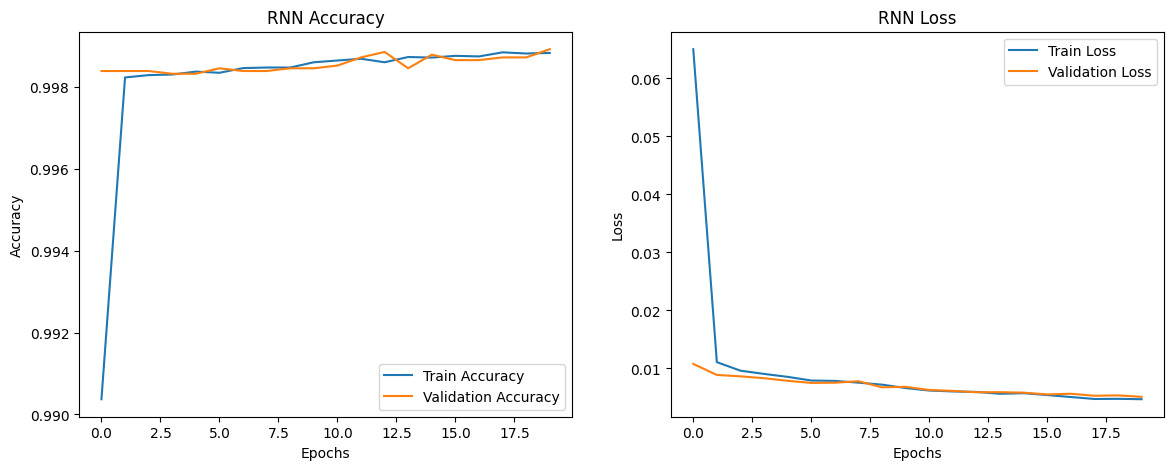

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, 'CNN')
plot_history(history_rnn, 'RNN')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('telematics_syn.csv')

# Display the shape and first few rows of the dataset
print(df.shape)
print(df.head())


(100000, 52)
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   

   Left.turn.intensity11  Left.turn.intensi

In [ ]:
# Create the 'ClaimYN' column
df['ClaimYN'] = df.apply(lambda row: 1 if row['NB_Claim'] > 1 and row['AMT_Claim'] > 1000 else 0, axis=1)

# Verify the creation of the column
print(df['ClaimYN'].value_counts())


ClaimYN
0    99822
1      178
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_cols = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Identify numerical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['NB_Claim', 'AMT_Claim', 'ClaimYN']]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing to the entire dataset
X = preprocessor.fit_transform(df)

# Extract the target variable
y = df['ClaimYN']


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Apply SMOTEENN to the data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Verify the new class distribution
print(pd.Series(y_resampled).value_counts())


ClaimYN
1    99822
0    99147
Name: count, dtype: int64


In [ ]:
# Split the dataset into train and test
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for CNN and RNN models
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_rnn = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_data=(X_val_cnn, y_val), batch_size=64)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2177/2177 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9188 - loss: 0.2052 - val_accuracy: 0.9943 - val_loss: 0.0232
Epoch 2/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0354 - val_accuracy: 0.9979 - val_loss: 0.0075
Epoch 3/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 4/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9994 - val_loss: 0.0048
Epoch 5/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 6/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 7/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9975 - loss: 0.0085 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 8/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accura

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(128, input_shape=(1, X_train_rnn.shape[2]), return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=20, validation_data=(X_val_rnn, y_val), batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9219 - loss: 0.1904 - val_accuracy: 0.9950 - val_loss: 0.0201
Epoch 2/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9931 - loss: 0.0263 - val_accuracy: 0.9986 - val_loss: 0.0053
Epoch 3/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 4/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 5/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 6/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 7/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9998 - val_loss: 8.5039e-04
Epoch 8/20
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9994 - loss: 0.0

933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


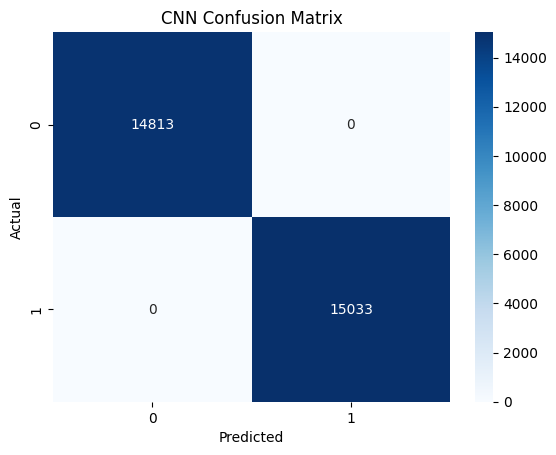

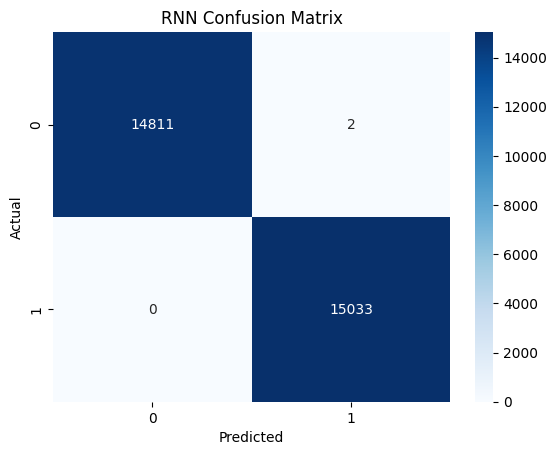

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    return f1, recall, precision, auc, mcc

# Evaluate CNN model
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_predictions = (cnn_predictions > 0.5).astype(int)
cnn_f1, cnn_recall, cnn_precision, cnn_auc, cnn_mcc = evaluate_model(y_test, cnn_predictions)

# Evaluate RNN model
rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_predictions = (rnn_predictions > 0.5).astype(int)
rnn_f1, rnn_recall, rnn_precision, rnn_auc, rnn_mcc = evaluate_model(y_test, rnn_predictions)

# Plot confusion matrices
plot_confusion_matrix(y_test, cnn_predictions, 'CNN Confusion Matrix')
plot_confusion_matrix(y_test, rnn_predictions, 'RNN Confusion Matrix')


In [ ]:
print("CNN Performance")
print(f"F1 Score: {cnn_f1}, Recall: {cnn_recall}, Precision: {cnn_precision}, AUC: {cnn_auc}, MCC: {cnn_mcc}")

print("\nRNN Performance")
print(f"F1 Score: {rnn_f1}, Recall: {rnn_recall}, Precision: {rnn_precision}, AUC: {rnn_auc}, MCC: {rnn_mcc}")

CNN Performance
F1 Score: 1.0, Recall: 1.0, Precision: 1.0, AUC: 1.0, MCC: 1.0

RNN Performance
F1 Score: 0.9999334841027006, Recall: 1.0, Precision: 0.9998669770535418, AUC: 0.999932491730237, MCC: 0.999865980256511


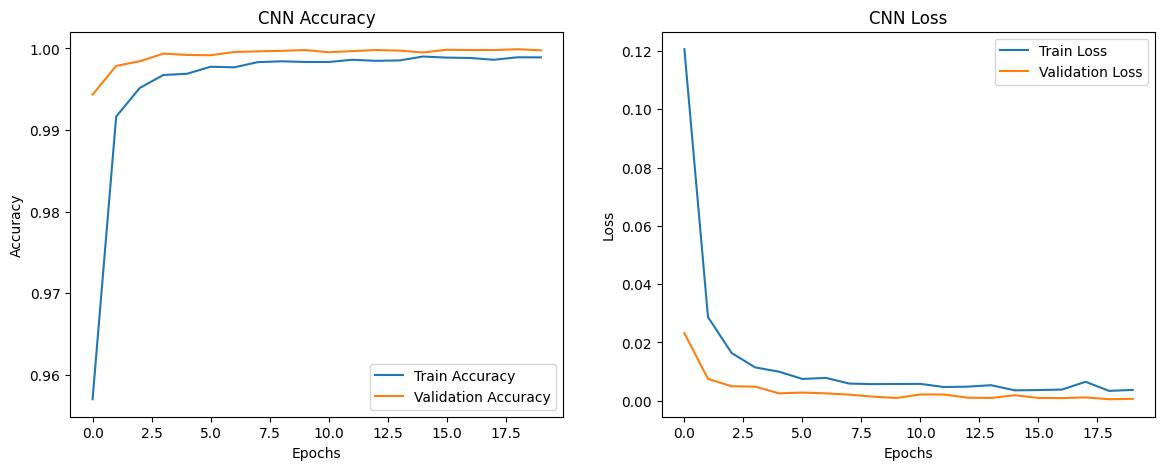

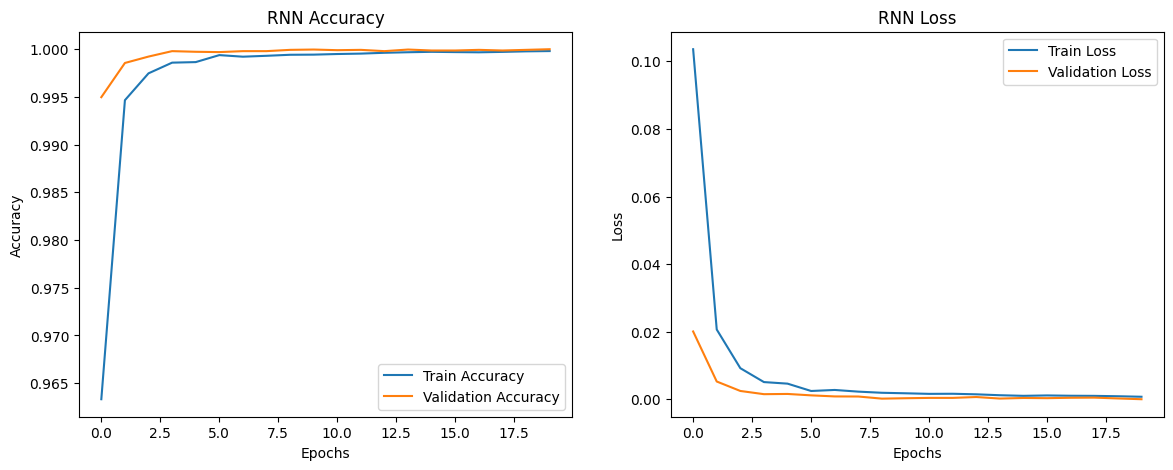

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, 'CNN')
plot_history(history_rnn, 'RNN')


In [ ]:
from tensorflow.keras import layers, models

# Define the xLSTM model
xlstm_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.LSTM(100, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0.2),
    layers.LSTM(100, activation='tanh', recurrent_activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
xlstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
xlstm_history = xlstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2596/4353 ━━━━━━━━━━━━━━━━━━━━ 2:33 88ms/step - accuracy: 0.7984 - loss: 0.4399

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(cnn_model, X_res, y_res, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')


NameError: name 'X_res' is not defined

Great, we'll integrate the xLSTM model as part of the project. Here’s the detailed step-by-step approach:

### 1. Load the Data
We’ll begin by loading the dataset.

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('/path/to/your/dataset/telematics_syn.csv')

# Display basic information
print(df.shape)  # Should print (100000, 52)
print(df.head())
```

### 2. Create `ClaimYN` Column
We’ll create the `ClaimYN` column based on the values of `NB_Claim` and `AMT_Claim`.

```python
# Creating the ClaimYN column
df['ClaimYN'] = df.apply(lambda x: 1 if x['NB_Claim'] > 1 and x['AMT_Claim'] > 1000 else 0, axis=1)
```

### 3. Preprocess the Dataset
#### 3.1 Handle Categorical Variables
Convert categorical columns into numerical ones using one-hot encoding.

```python
# Identify categorical columns
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
```

#### 3.2 Normalize Numerical Features
Normalize the numerical columns to ensure that the model converges faster.

```python
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical columns
numerical_columns = df.columns.difference(['ClaimYN', 'NB_Claim', 'AMT_Claim'])
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
```

### 4. Handle Imbalanced Dataset
We'll use both undersampling and SMOTE to handle the imbalance.

```python
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Separate the features and target
X = df.drop(['ClaimYN', 'NB_Claim', 'AMT_Claim'], axis=1)
y = df['ClaimYN']

# Define undersampling and SMOTE
under = RandomUnderSampler(sampling_strategy=0.5)
smote = SMOTE()

# Create pipeline
steps = [('under', under), ('smote', smote)]
pipeline = Pipeline(steps=steps)

# Apply the resampling
X_res, y_res = pipeline.fit_resample(X, y)
```

### 5. Dropping `NB_Claim` and `AMT_Claim`
These columns have already been excluded in the preprocessing step, so no further action is required here.

### 6. Split the Dataset
We'll split the dataset into training, testing, and validation sets.

```python
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
```

### 7. Build and Train CNN Model
Let's define and train a simple CNN model.

```python
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
cnn_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
```

### 8. Build and Train RNN Model
Now, we'll define and train an RNN model using LSTM.

```python
# Define the RNN model
rnn_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.LSTM(50, return_sequences=True),
    layers.LSTM(50),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
```

### 9. Build and Train xLSTM Model
Now, we will build and train the xLSTM model.

```python
# Define the xLSTM model
xlstm_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.LSTM(100, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0.2),
    layers.LSTM(100, activation='tanh', recurrent_activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
xlstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
xlstm_history = xlstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
```

### 10. Evaluate Models and Plot Metrics
We'll compare the models using F1-score, recall, precision, AUC, and MCC. Then, we'll plot confusion matrices and visualize training/validation accuracy and loss.

```python
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, matthews_corrcoef, ConfusionMatrixDisplay

# Evaluate on the test set
models = {'CNN': cnn_model, 'RNN': rnn_model, 'xLSTM': xlstm_model}
metrics = {}

for name, model in models.items():
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    metrics[name] = {
        'F1 Score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'{name} Confusion Matrix')
    plt.show()

# Print metrics
for name, metric in metrics.items():
    print(f'{name} Model Metrics:')
    for metric_name, value in metric.items():
        print(f'{metric_name}: {value}')
    print('\n')
```

### 11. Plot Training and Validation Accuracy and Loss
We’ll visualize the training and validation accuracy and loss for each model.

```python
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{title} Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} Loss')
    plt.show()

# Plot histories
plot_history(cnn_history, 'CNN')
plot_history(rnn_history, 'RNN')
plot_history(xlstm_history, 'xLSTM')
```

This completes the step-by-step process of building, training, and evaluating the CNN, RNN, and xLSTM models. If you need any further adjustments or additional models, let me know!

The confusion matrices you've shared show perfect or near-perfect performance, which is highly unusual and suggests that there might be an issue with model overfitting or data leakage. This kind of result often occurs when the model has learned the training data too well, including any potential noise or irrelevant details, leading to a lack of generalization on new data.

### Steps to Address Potential Bias and Overfitting

1. **Data Leakage**: Ensure that there is no data leakage between the training, validation, and test sets. This includes checking that features derived from the target variable are not used in the training process.

2. **Cross-Validation**: Implement cross-validation to ensure that the model's performance is consistent across different subsets of the data.

3. **Regularization**: Add regularization to the models to prevent overfitting. For neural networks, you can use dropout layers, L1/L2 regularization, or both.

4. **Reduce Model Complexity**: Simplify the models by reducing the number of layers or neurons to prevent the model from memorizing the training data.

5. **Augment Data**: If possible, augment the data by introducing variations or transformations to increase the diversity of the training set.

6. **Resampling Techniques**: While you've already used SMOTE and undersampling, it might be worth revisiting the sampling strategy to ensure it's not creating synthetic samples that are too similar to the original data, leading to overfitting.

7. **Early Stopping**: Use early stopping during training to halt the process when the validation loss stops decreasing, which can prevent the model from continuing to overfit.

8. **Analyze Feature Importance**: Examine which features are most influential in the model's predictions. High influence from features derived directly from the target variable might indicate leakage.

### Implementing Cross-Validation and Regularization

#### Cross-Validation

```python
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(cnn_model, X_res, y_res, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
```

#### Adding Regularization to the Models

For CNN:
```python
from tensorflow.keras import regularizers

cnn_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
```

For RNN (LSTM):
```python
rnn_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.LSTM(50, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)),
    layers.LSTM(50, kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
```

For xLSTM:
```python
xlstm_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.LSTM(100, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(0.001)),
    layers.LSTM(100, activation='tanh', recurrent_activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
```

Finally, after applying these steps, re-train and evaluate the models again. If the issue persists, further investigation might be necessary, possibly involving a closer inspection of the data or simplifying the problem space.